In [286]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.model_selection import cross_val_score,cross_val_predict,StratifiedKFold

import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns 


import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import preprocessing 

from sklearn import linear_model, svm
from sklearn.ensemble import GradientBoostingRegressor as xgb 
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score
from scipy import stats 
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn import linear_model, svm
import datetime
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
import time
from sklearn import preprocessing
from scipy.stats import skew

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv


In [287]:
train.shape

(1457, 64)

In [270]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1457 entries, 0 to 1459
Data columns (total 64 columns):
Id               1457 non-null int64
MSSubClass       1457 non-null int64
MSZoning         1457 non-null object
LotArea          1457 non-null int64
Street           1457 non-null object
LotShape         1457 non-null object
LandContour      1457 non-null object
Utilities        1457 non-null object
LotConfig        1457 non-null object
LandSlope        1457 non-null object
Neighborhood     1457 non-null object
Condition1       1457 non-null object
Condition2       1457 non-null object
BldgType         1457 non-null object
HouseStyle       1457 non-null object
OverallQual      1457 non-null int64
OverallCond      1457 non-null int64
YearBuilt        1457 non-null int64
YearRemodAdd     1457 non-null int64
RoofStyle        1457 non-null object
RoofMatl         1457 non-null object
Exterior1st      1457 non-null object
Exterior2nd      1457 non-null object
ExterQual        1457 non-

In [271]:
train.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
                ..
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Skewed_SP        0
Length: 64, dtype: int64

In [272]:
#missing value
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
train = train.drop((missing_data[missing_data['Total'] > 1]).index,1)
train = train.drop(train.loc[train['Electrical'].isnull()].index)
train.isnull().sum().max() 

0

In [273]:
train.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
                ..
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Skewed_SP        0
Length: 64, dtype: int64

In [274]:
#outliers
train.sort_values(by = 'GrLivArea', ascending = False)[:2]
train = train.drop(train[train['Id'] == 1299].index)
train = train.drop(train[train['Id'] == 524].index)

In [275]:
train.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Skewed_SP
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2,2008,WD,Normal,208500,12.247699
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,5,2007,WD,Normal,181500,12.109016
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,9,2008,WD,Normal,223500,12.317171
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,2,2006,WD,Abnorml,140000,11.849405
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,12,2008,WD,Normal,250000,12.429220


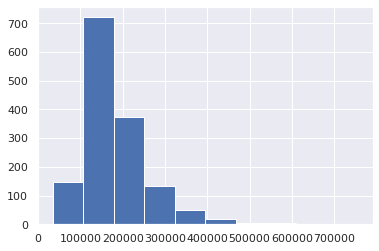

In [276]:
plt.hist(train.SalePrice)
plt.show()

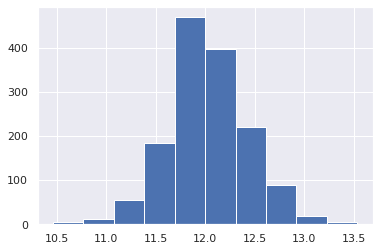

In [277]:
train['Skewed_SP'] = np.log(train['SalePrice']+1)
plt.hist(train['Skewed_SP'])
plt.show()

In [278]:
numerical_features = train.select_dtypes(include=[np.number])
numerical_features

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Skewed_SP
0,1,60,8450,7,5,2003,2003,706,0,150,...,61,0,0,0,0,0,2,2008,208500,12.247699
1,2,20,9600,6,8,1976,1976,978,0,284,...,0,0,0,0,0,0,5,2007,181500,12.109016
2,3,60,11250,7,5,2001,2002,486,0,434,...,42,0,0,0,0,0,9,2008,223500,12.317171
3,4,70,9550,7,5,1915,1970,216,0,540,...,35,272,0,0,0,0,2,2006,140000,11.849405
4,5,60,14260,8,5,2000,2000,655,0,490,...,84,0,0,0,0,0,12,2008,250000,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,1999,2000,0,0,953,...,40,0,0,0,0,0,8,2007,175000,12.072547
1456,1457,20,13175,6,6,1978,1988,790,163,589,...,0,0,0,0,0,0,2,2010,210000,12.254868
1457,1458,70,9042,7,9,1941,2006,275,0,877,...,60,0,0,0,0,2500,5,2010,266500,12.493133
1458,1459,20,9717,5,6,1950,1996,49,1029,0,...,0,112,0,0,0,0,4,2010,142125,11.864469


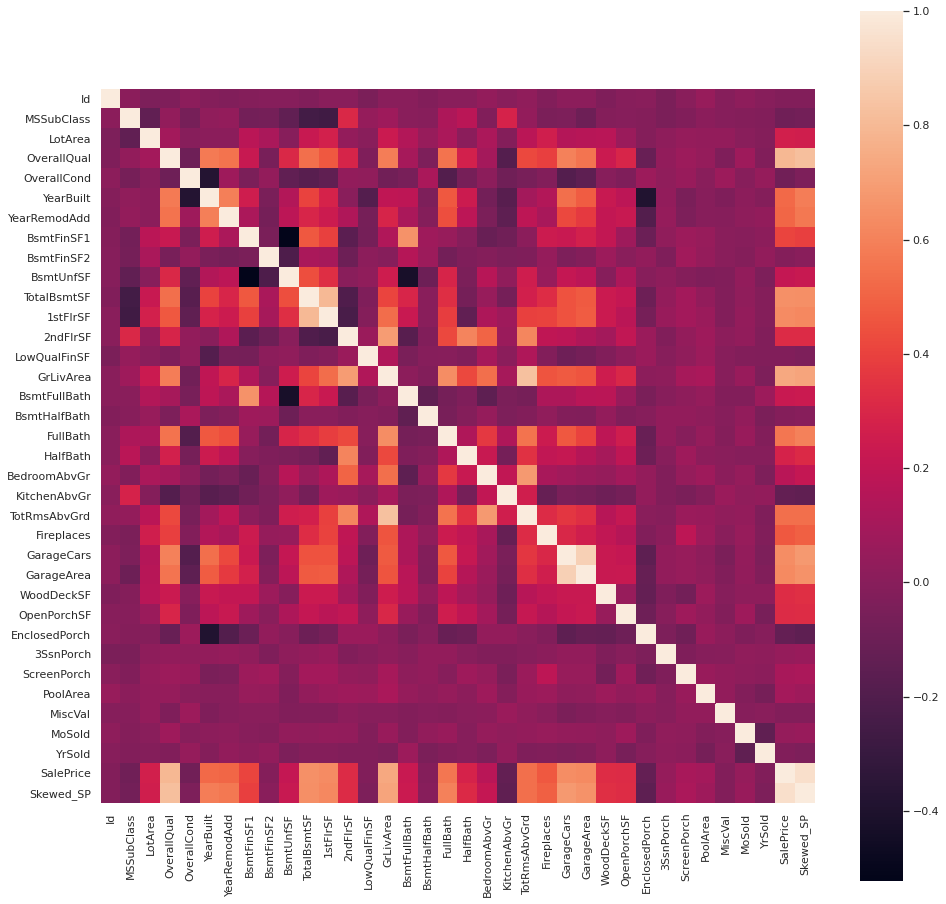

In [279]:
corr = numerical_features.corr()

plt.figure(figsize=(16,16))

sns.set(font_scale=1)  
sns.heatmap(corr, vmax=1, square=True)

In [280]:
corr_list = corr['SalePrice'].sort_values(axis=0,ascending=False).iloc[1:]
print(corr_list)

Skewed_SP        0.948406
OverallQual      0.795863
GrLivArea        0.734962
TotalBsmtSF      0.651553
GarageCars       0.641111
1stFlrSF         0.631667
GarageArea       0.629209
FullBath         0.562384
TotRmsAbvGrd     0.537826
YearBuilt        0.523986
YearRemodAdd     0.508047
Fireplaces       0.469903
BsmtFinSF1       0.409415
WoodDeckSF       0.324767
OpenPorchSF      0.321119
2ndFlrSF         0.320663
HalfBath         0.284884
LotArea          0.268174
BsmtFullBath     0.228419
BsmtUnfSF        0.214427
BedroomAbvGr     0.168267
ScreenPorch      0.111388
PoolArea         0.099484
MoSold           0.046071
3SsnPorch        0.044555
BsmtFinSF2      -0.011456
BsmtHalfBath    -0.016909
MiscVal         -0.021214
Id              -0.021512
LowQualFinSF    -0.025639
YrSold          -0.028866
OverallCond     -0.078016
MSSubClass      -0.084222
EnclosedPorch   -0.128694
KitchenAbvGr    -0.135974
Name: SalePrice, dtype: float64


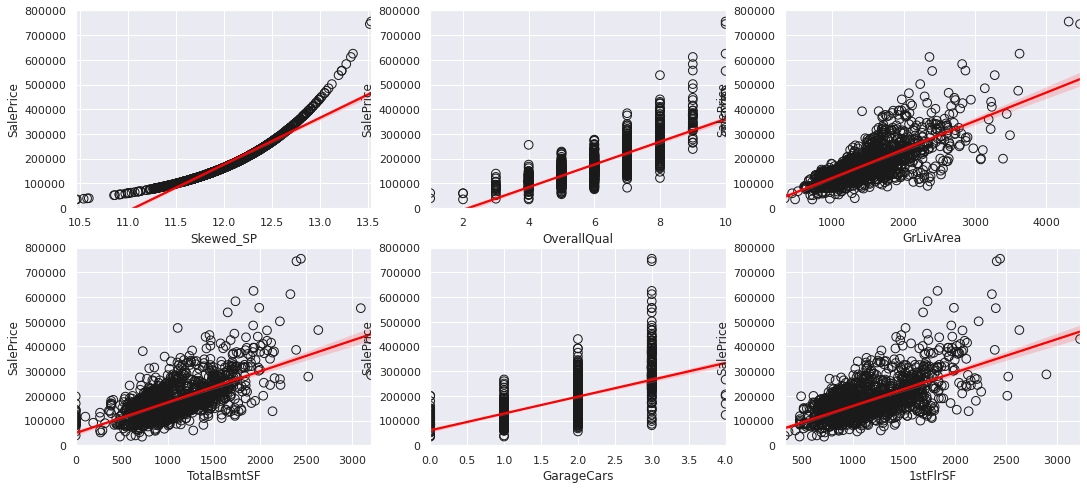

In [281]:
plt.figure(figsize=(18,8))
for i in range(6):
    ii = '23'+str(i+1)
    plt.subplot(ii)
    feature = corr_list.index.values[i]
    plt.scatter(train[feature], train['SalePrice'], facecolors='none',edgecolors='k',s = 75)
    sns.regplot(x = feature, y = 'SalePrice', data = train,scatter=False, color = 'Red')
    ax=plt.gca() 
    ax.set_ylim([0,800000])

In [294]:
train_y = train['SalePrice']  #saving the output variable as a seperate dataset 

train_x = train.select_dtypes(include=[np.number]).drop('SalePrice', axis =1) # dropping output variable from train dataset 
train_x.head(10)



,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Skewed_SP
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,61,0,0,0,0,0,2,2008,12.247699
1,2,20,9600,6,8,1976,1976,978,0,284,...,298,0,0,0,0,0,0,5,2007,12.109016
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,42,0,0,0,0,0,9,2008,12.317171
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,35,272,0,0,0,0,2,2006,11.849405
4,5,60,14260,8,5,2000,2000,655,0,490,...,192,84,0,0,0,0,0,12,2008,12.429220
5,6,50,14115,5,5,1993,1995,732,0,64,...,40,30,0,320,0,0,700,10,2009,11.870607
6,7,20,10084,8,5,2004,2005,1369,0,317,...,255,57,0,0,0,0,0,8,2007,12.634606
7,8,60,10382,7,6,1973,1973,859,32,216,...,235,204,228,0,0,0,350,11,2009,12.206078
8,9,50,6120,7,5,1931,1950,0,0,952,...,90,0,205,0,0,0,0,4,2008,11.774528
9,10,190,7420,5,6,1939,1950,851,0,140,...,0,4,0,0,0,0,0,1,2008,11.678448


In [292]:
null_counts = test.isnull().sum()
null_counts[null_counts > 0]

#test['Alley'] = test['Alley'].fillna(train[columnName].value_counts().index[0])

Series([], dtype: int64)

In [291]:
test['BsmtFinSF2'] = test['BsmtFinSF2'].fillna(train['BsmtFinSF2'].value_counts().index[0])
test['BsmtUnfSF'] = test['BsmtUnfSF'].fillna(train['BsmtUnfSF'].value_counts().index[0])

test['TotalBsmtSF'] = test['TotalBsmtSF'].fillna(train['TotalBsmtSF'].value_counts().index[0])

test['GarageCars'] = test['GarageCars'].fillna(train['GarageCars'].value_counts().index[0])
test['GarageArea'] = test['GarageArea'].fillna(train['GarageArea'].value_counts().index[0])





In [293]:
test = test.select_dtypes(include=[np.number]) 

In [295]:
## Ridge Regression with built in cross validation ####
# by default it performs Generalized Cross-Validation, which is a form of efficient Leave-One-Out cross-validation.

clf_Ridge = linear_model.Ridge(fit_intercept=True, normalize=True, alpha = 0.01) 
clf_Ridge.fit(train_x, train_y)  
clf_Ridge_score = cross_val_score(clf_Ridge,train_x, train_y, cv = 10, scoring = 'r2')

### Support Vecotr Regression #####
X_scaler = preprocessing.StandardScaler()
train_x = X_scaler.fit_transform(train_x)
clf_SVR = svm.SVR(kernel='rbf', gamma='auto',C = 1,epsilon = 0.1)
clf_SVR.fit(train_x, train_y)
clf_SVR_score = cross_val_score(clf_SVR, train_x, train_y, cv = 10, scoring='r2') 

#### LassoCV######

clf_lasso = linear_model.LassoCV()
clf_lasso.fit(train_x, train_y)
clf_lasso_score = cross_val_score(clf_lasso, train_x, train_y, cv = 10, scoring='r2') 

### Gradient Boosting Regressor ##

clf_xgb = xgb(learning_rate=0.01, n_estimators=500, max_depth=3, subsample= 0.5)
clf_xgb.fit(train_x, train_y)
clf_xgb_score = cross_val_score(clf_xgb, train_x, train_y, cv = 10, scoring='r2') 

 #R squared coefficients for all the models after training 

print ("")
print("The R2 score using for Ridge is %f" % (clf_Ridge_score.mean()))
print("The R2 score for Lasso is %f" % (clf_lasso_score.mean())) 
print("The R2 score for SVR is %f" % (clf_SVR_score.mean())) 
print("The R2 score for Gradient Boosting Regression is %f" % (clf_xgb_score.mean())) 

test_x = X_scaler.fit_transform(test)
predict = pd.DataFrame(np.exp(clf_xgb.predict(test_x)), columns= ['SalePrice'])    # Predictions on the test set


The R2 score using for Ridge is 0.914256
The R2 score for Lasso is 0.914814
The R2 score for SVR is -0.053012
The R2 score for Gradient Boosting Regression is 0.998922


ValueError: Number of features of the model must match the input. Model n_features is 35 and input n_features is 32 

In [301]:
len(test_x)

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [305]:
len(train_x)

1457